# Lab 3 
## Angel Chamo

In [42]:
# librarias 
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno 
import matplotlib.pyplot as plt
from sklearn.preprocessing import  StandardScaler
from sklearn.linear_model import LinearRegression

In [4]:
train = pd.read_csv('train.csv')
train.head() 

,id,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,9744,-121.65,36.77,15,2191,358.0,1150,330,4.7969,227500.0,<1H OCEAN
1,13893,-116.27,34.13,37,452,109.0,184,59,3.7292,65800.0,INLAND
2,18277,-122.07,37.34,35,1172,184.0,512,175,7.3561,500001.0,<1H OCEAN
3,16176,-122.39,37.74,52,126,24.0,37,27,10.2264,225000.0,NEAR BAY
4,8843,-118.38,34.09,28,4001,1352.0,1799,1220,2.5784,272900.0,<1H OCEAN


In [5]:
train.describe()

,id,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,14447.000000,14447.000000,14447.000000,14447.000000,14447.000000,14310.000000,14447.000000,14447.000000,14447.000000,14447.000000
mean,10275.451997,-119.580422,35.642011,28.845435,2635.287534,537.778756,1425.171454,500.116772,3.863949,206873.687824
std,5957.136373,2.003511,2.135526,12.585221,2215.285809,424.012399,1123.733449,386.181946,1.892919,115263.889710
min,1.000000,-124.300000,32.540000,1.000000,2.000000,1.000000,6.000000,1.000000,0.499900,14999.000000
25%,5139.500000,-121.805000,33.930000,18.000000,1444.000000,295.000000,786.000000,280.000000,2.567150,119600.000000
50%,10210.000000,-118.500000,34.260000,29.000000,2121.000000,433.000000,1163.000000,408.000000,3.535000,179700.000000
75%,15449.000000,-118.020000,37.720000,37.000000,3137.500000,647.000000,1722.000000,604.500000,4.722850,264600.000000
max,20640.000000,-114.310000,41.950000,52.000000,39320.000000,6445.000000,28566.000000,6082.000000,15.000100,500001.000000


1) Determine que columnas poseen faltantes (NA o Nulos)

In [13]:
# valores no nulos 
train.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14447 entries, 0 to 14446
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  14447 non-null  int64  
 1   longitude           14447 non-null  float64
 2   latitude            14447 non-null  float64
 3   housing_median_age  14447 non-null  int64  
 4   total_rooms         14447 non-null  int64  
 5   total_bedrooms      14310 non-null  float64
 6   population          14447 non-null  int64  
 7   households          14447 non-null  int64  
 8   median_income       14447 non-null  float64
 9   median_house_value  14447 non-null  float64
 10  ocean_proximity     14447 non-null  object 
dtypes: float64(5), int64(5), object(1)
memory usage: 1.2+ MB


C:\Users\50255\AppData\Local\Temp\ipykernel_18900\591670688.py:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  train.info(verbose=True,null_counts=True)


<Axes: >

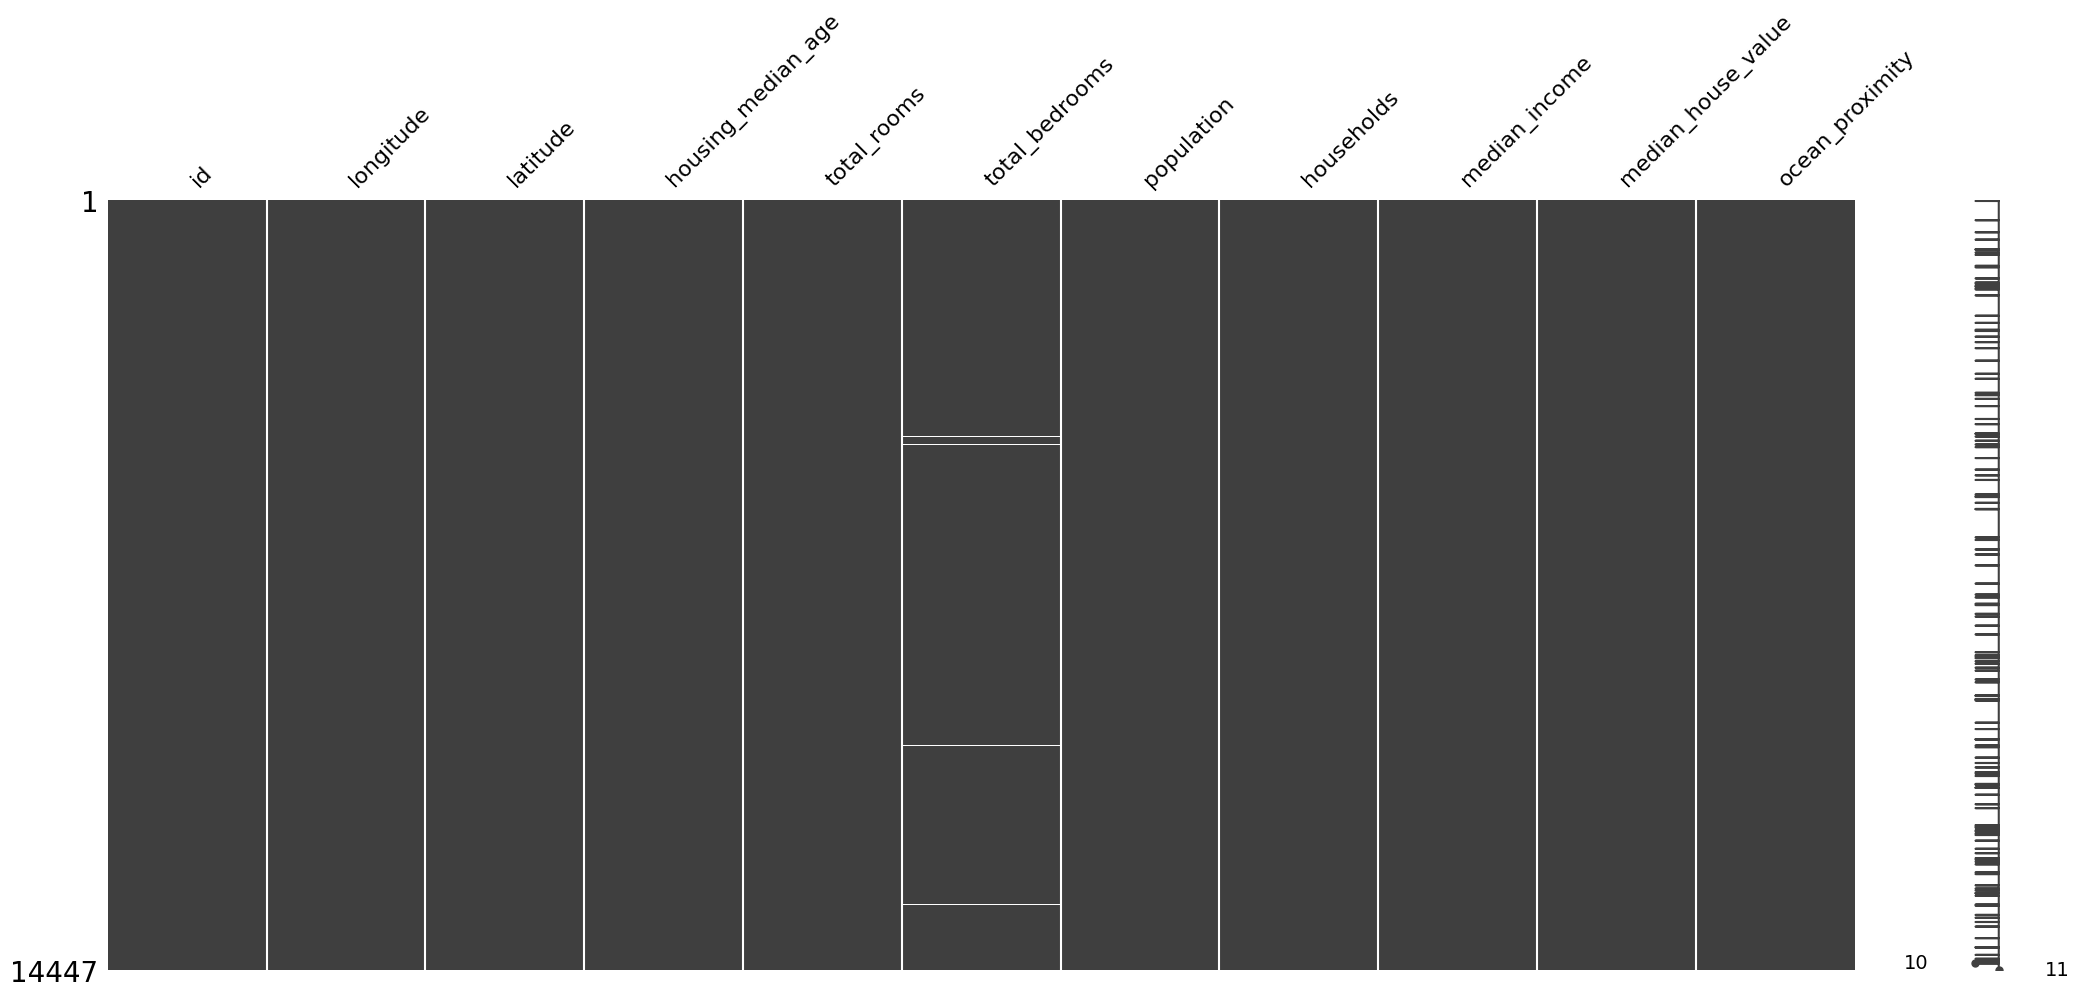

In [15]:
# mapa de calor para identificar los valores nulos 
msno.matrix(train)

2) Determine la proporción de faltantes para cada columna con faltantes, muestre una 
gráfica de barras.

<Axes: >

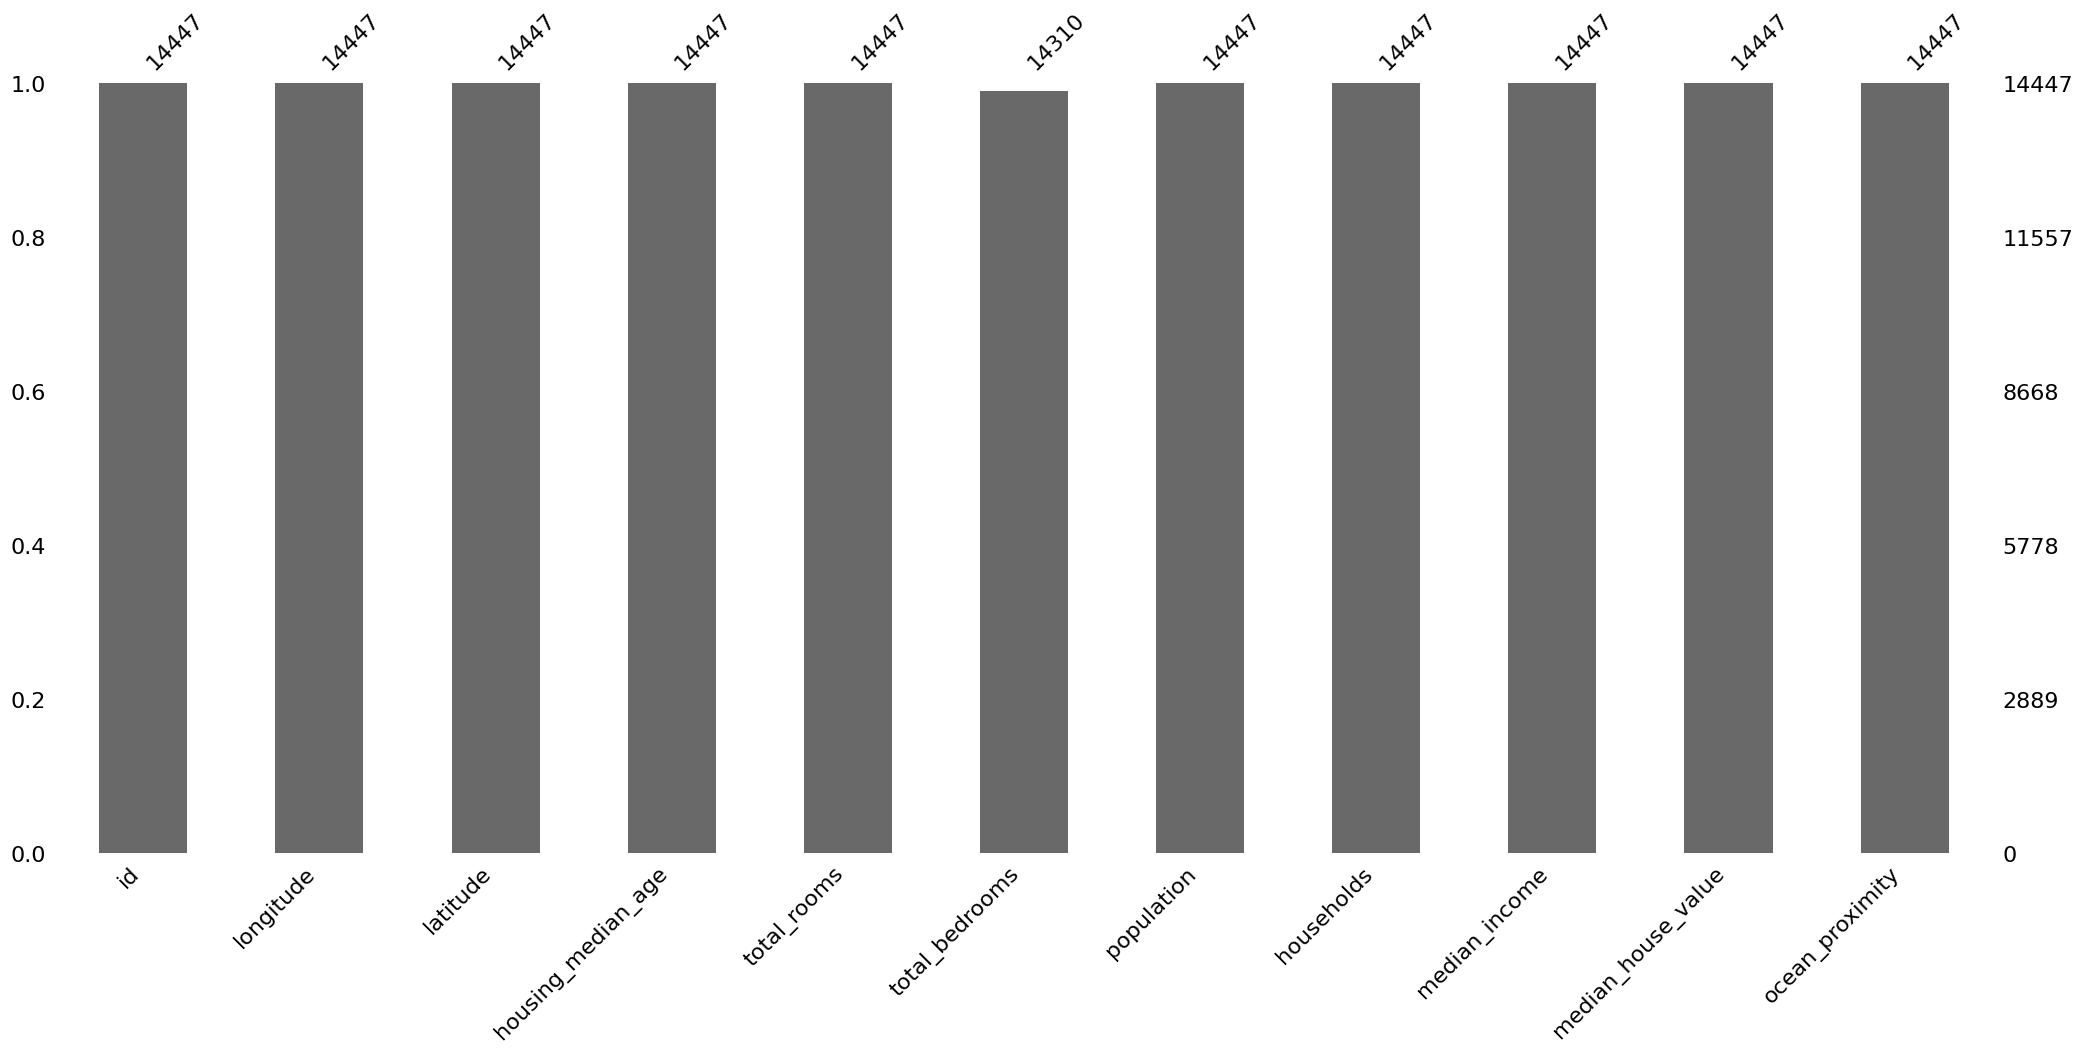

In [16]:
# grafica de barras para vizualizar valore nulos 
msno.bar(train)

Por lo tanto, dado el analisis tenemos que total bedrooms es la unica columna que tiene valores faltantes. 

3) Si la variable es numérica realice un análisis de cual sería el mejor método para 
realizar la imputación de datos, debe mostrar un bloque de código donde se muestre 
cada imputación y su análisis. Recuerde que puede ser: 
a. Eliminar los faltantes,  
b. Imputación de media o mediana, 
c. Valores arbitrarios (extremo derecho y extremo izquierdo), 
d. Generación  de  números  aleatorios  en  base  a  la  distribución  (no  visto  en 
clase).

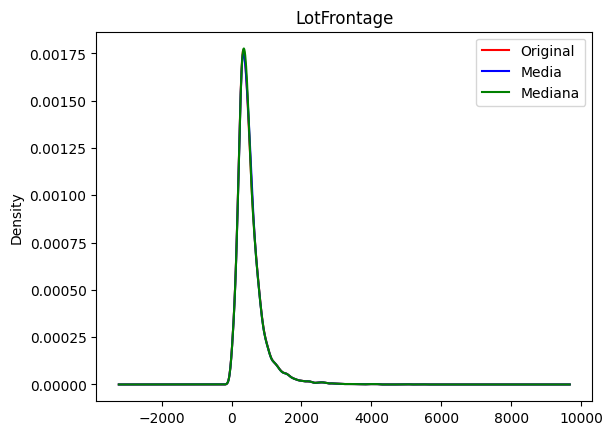

In [10]:
# media y mediana 
total_bed_media = train['total_bedrooms'].mean()
total_bed_mediana = train['total_bedrooms'].median()
# imputamos media y mediana 
train['total_bedrooms_media'] = np.round(train['total_bedrooms'].fillna(total_bed_media))
train['total_bedrooms_mediana'] = np.round(train['total_bedrooms'].fillna(total_bed_mediana))
# graficamos 
fig = plt.figure()
ax = fig.add_subplot(111)

train['total_bedrooms'].plot.density(color='red', label='Original')
train['total_bedrooms_media'].plot.density(color='blue', label='Media')
train['total_bedrooms_mediana'].plot.density(color='green', label='Mediana')

plt.title('LotFrontage')
ax.legend()

<Axes: >

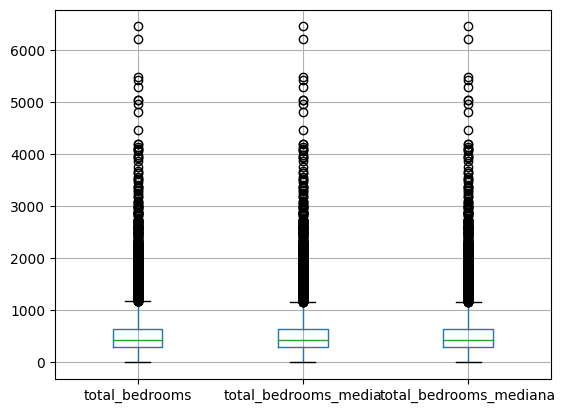

In [15]:
train[['total_bedrooms', 'total_bedrooms_media','total_bedrooms_mediana']].boxplot()

Realmente, las dos tienen una buena distribusion y ajuste a los datos. Por lo tanto, se tomara la decision de tomar la mediana como imputacion para realizar el analisis correspondiente. 

4) Si la variable es categórica, realice una imputación que considere necesaria

no hay variables categoricas con missing values


 5) 
Realice la codificación de variables categóricas, determine cual es le mejor enfoque 
para cada caso, recuerde que puede realizar los siguientes enfoques: 
a. One Hote Encodign. 
b. Codificación por Frecuencia. 
c. Codificación por Densidad

In [26]:
# variables categoricas 
train.dtypes

id                          int64
longitude                 float64
latitude                  float64
housing_median_age          int64
total_rooms                 int64
total_bedrooms            float64
population                  int64
households                  int64
median_income             float64
median_house_value        float64
ocean_proximity            object
total_bedrooms_media      float64
total_bedrooms_mediana    float64
dtype: object

solamente ocean proximity es una variable categorica

<BarContainer object of 5 artists>

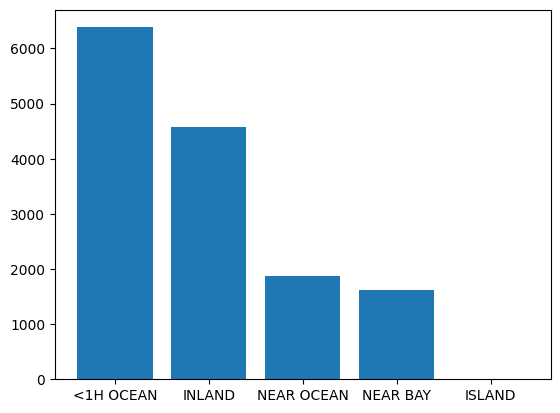

In [29]:
# analizamos la variable 
conteo = train['ocean_proximity'].value_counts()
plt.bar(conteo.index,conteo.values) 


Dada las carecteristicas de los datos, se realizara ONE HOTE ENCODING 


In [33]:
train = pd.get_dummies(train, columns = ['ocean_proximity'])

7 ) Para todas las variables resultantes realice Feature Scaling según lo considere más 
pertinente.

In [41]:
scaler = StandardScaler()
train_scaler = scaler.fit_transform(train)
train_scaler = pd.DataFrame(train_scaler, columns=train.columns)
train_scaler 

,id,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,total_bedrooms_media,total_bedrooms_mediana,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-0.089216,-1.033011,0.528220,-1.100173,-0.200562,-0.424009,-0.244881,-0.440525,0.492881,0.178955,-0.426039,-0.423557,1.123833,-0.680976,-0.011767,-0.355258,-0.385003
1,0.607284,1.652367,-0.708052,0.647970,-0.985590,-1.011276,-1.104545,-1.142291,-0.071188,-1.223962,-1.016111,-1.013458,-0.889812,1.468480,-0.011767,-0.355258,-0.385003
2,1.343233,-1.242650,0.795142,0.489048,-0.660564,-0.834389,-0.812651,-0.841904,1.844913,2.543186,-0.838378,-0.835777,1.123833,-0.680976,-0.011767,-0.355258,-0.385003
3,0.990535,-1.402375,0.982456,1.839886,-1.132754,-1.211749,-1.235364,-1.225156,3.361301,0.157265,-1.217541,-1.214830,-0.889812,-0.680976,-0.011767,2.814855,-0.385003
4,-0.240468,0.599180,-0.726784,-0.067179,0.616516,1.920344,0.332678,1.864168,-0.679159,0.572847,1.929510,1.931310,1.123833,-0.680976,-0.011767,-0.355258,-0.385003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14442,-1.631453,-1.332496,0.996505,1.124736,0.764584,1.349586,0.588086,1.431715,-0.469634,0.316904,1.356026,1.357992,-0.889812,-0.680976,-0.011767,2.814855,-0.385003
14443,0.976098,-1.447298,0.968408,1.124736,0.548351,1.132604,0.063922,0.851657,-0.176638,1.675572,1.138007,1.140037,-0.889812,-0.680976,-0.011767,-0.355258,2.597380
14444,-0.200179,0.704000,-0.445813,-1.338556,1.013770,0.625525,0.678858,0.579755,0.159944,-0.303433,0.628508,0.630685,-0.889812,1.468480,-0.011767,-0.355258,-0.385003
14445,0.480541,-0.928191,1.324304,-1.894783,1.368138,1.509964,1.525173,1.633699,-0.265815,-0.850024,1.517170,1.519090,-0.889812,1.468480,-0.011767,-0.355258,-0.385003


7 ) Crear un modelo de regresión que permita minimizar el RMSE en predicción, para 
este inciso puede utilizar cualquier modelo de regresión que considere adecuado. 

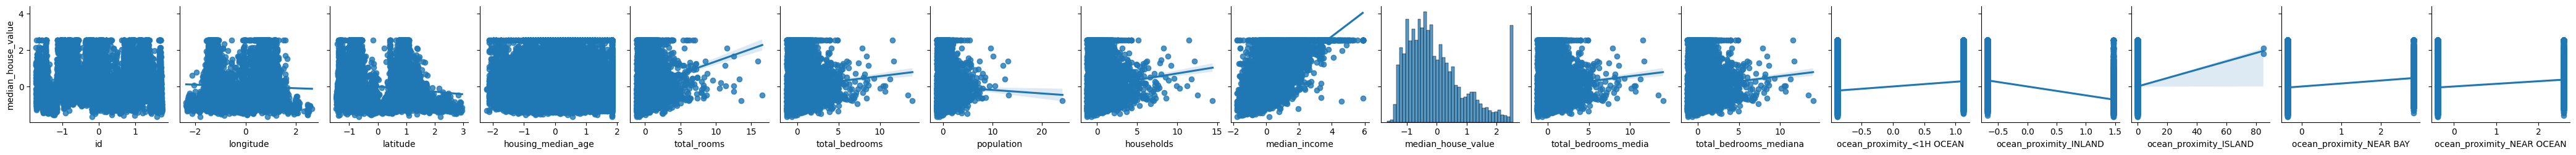

In [43]:
sns.pairplot(train_scaler, y_vars='median_house_value', kind='reg')

In [44]:
import statsmodels.api as sm           ## Este proporciona funciones para la estimación de muchos modelos estadísticos
import statsmodels.formula.api as smf  ## Permite ajustar modelos estadísticos utilizando fórmulas de estilo R

In [57]:
train_scaler.columns

Index(['id', 'longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'total_bedrooms_media', 'total_bedrooms_mediana',
       'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN', 'ocean_proximity_OCEAN'],
      dtype='object')

In [58]:
train_scaler['ocean_proximity_OCEAN']  = train_scaler['ocean_proximity_<1H OCEAN'] 
train_scaler['ocean_proximity_NEAR_BAY']  = train_scaler['ocean_proximity_NEAR BAY'] 
train_scaler['ocean_proximity_NEAR_OCEAN']  = train_scaler['ocean_proximity_NEAR OCEAN'] 

In [59]:
modelo = smf.ols('median_house_value ~ housing_median_age + total_rooms + total_bedrooms + population + households + median_income + total_bedrooms_media + total_bedrooms_mediana + ocean_proximity_OCEAN+ ocean_proximity_INLAND + ocean_proximity_ISLAND + ocean_proximity_NEAR_BAY + ocean_proximity_NEAR_OCEAN', data = train_scaler).fit()

In [60]:
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     median_house_value   R-squared:                       0.642
Model:                            OLS   Adj. R-squared:                  0.641
Method:                 Least Squares   F-statistic:                     2560.
Date:                Fri, 09 Jun 2023   Prob (F-statistic):               0.00
Time:                        12:59:30   Log-Likelihood:                -12974.
No. Observations:               14310   AIC:                         2.597e+04
Df Residuals:                   14299   BIC:                         2.605e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                  -5.103e-06      0.005     -0.001      0.999      -0.010       0.010
housing_median_age             0.1268      0.006     22.055      0.000       0.115       0.138
total_rooms                   -0.1235      0.018     -6.853      0.000      -0.159      -0.088
total_bedrooms                 0.0930      0.010      9.069      0.000       0.073       0.113
population                    -0.4098      0.013    -30.706      0.000      -0.436      -0.384
households                     0.3025      0.031      9.819      0.000       0.242       0.363
median_income                  0.6589      0.007     99.894      0.000       0.646       0.672
total_bedrooms_media           0.0934      0.010      9.069      0.000       0.073       0.114
total_bedrooms_mediana         0.0934      0.010      9.069      0.000       0.073       0.114
ocean_proximity_OCEAN          0.0832      0.003     24.901      0.000       0.077       0.090
ocean_proximity_INLAND        -0.2035      0.004    -52.688      0.000      -0.211      -0.196
ocean_proximity_ISLAND         0.0237      0.005      4.759      0.000       0.014       0.034
ocean_proximity_NEAR_BAY       0.0656      0.005     14.518      0.000       0.057       0.074
ocean_proximity_NEAR_OCEAN     0.0965      0.004     22.991      0.000       0.088       0.105
==============================================================================
Omnibus:                     2949.264   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8981.886
Skew:                           1.064   Prob(JB):                         0.00
Kurtosis:                       6.246   Cond. No.                     2.37e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.49e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [62]:
modelo.mse_resid 

0.3592274584844097